# Outline

[1. Introduction](#Introduction)    
[2. Objective](#Objective)      
[3. Dataset Description](#DatasetDescription)          
[4. Analysis Method](#AnalysisMethod)        
[4.1 Exploratory data analysis](#ExploratoryDataAnalysis)    
[4.2 Clustering](#Clustering)     
[5. Discussion](#Discussion)    
[6. Conclusions](#Conclusions)     
[7. References](#References)     


<a id='Introduction'></a>
# 1. Introduction 


For most of the companies, making tailored strategis for their customers is crucial since tailored strategis can enhance customers engagement and increase business total profit. To make suitable marketing strategis, **Customer Segmentation** is a common method for marketer to have better understanding of the customers. 

Customer Segmentation is a useful practice to divide customers into different groups. Segmentation puts the customers with similar features into the same group and puts customers with dissimilar features into different groups. This allows marketer to know the characteristics of each groups and to apply specific strategies to them accordingly.

<a id='Objective'></a>
# 2. Objective


For this project, I did a customer segmentation analysis to answer the following questions:

1. What is the features of each groups (clusters)?     
  
  
2. What marketing strategies or advices will be given based on my analysis?

<a id='DatasetDescription'></a>
# 3. Dataset Description


I use **Mall_Customers.csv** from Kaggle (source: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) as my dataset. This dataset includes the following columns:
1. `CustomerID`: Unique ID of customers. 
2. `Gender`: Gender of customers. noted as Female/Male
3. `Age`: Age of customers
4. `Annual Income (k$)`: Annual Income of customers
5. `Spending Score (1-100)`: Score (0-100) assigned by the mall regarding to customer behavior and spending


<a id='AnalysisMethod'></a>
# 4. Analysis Method


We first use exploratory data analysis to give our data a whole overview. Aftering have basic understanding of our data, we use K-Means Clustering to segment our customers into differnet groups.

Analysis sections are listed below:

**4.1 Exploratory Data Analysis**  
- [Import Libraries](#ImportLibraries)   
- [Overview of dataset](#Overviewofdataset)   
- [Overview for each columns](#Overviewforeachcolumns)   
- [Comparison between multiple features](#Comparisonbetweenmultiplefeatures)   




**4.2 Clustering** 
- [Standardize the data](#Standardizethedata)
- [Segmentation1: Annual Income and Spending Score](#Segmentation1)
- [Segmentation2: Age and Spending Score](#Segmentation2)
- [Segmentation3: Age, Annual Income and Spending Score](#Segmentation3)


<a id='ExploratoryDataAnalysis'></a>
# 4.1 Exploratory Data Analysis
Exploratory Data Analysis gives us an overview to our dataset. 

<a id='ImportLibraries'></a>
###  Import Libraries

In [2]:
# Import libraries
%matplotlib inline

import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

<a id='Overviewofdataset'></a>
### Overview of dataset


In [3]:
# Read the data 
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
# Check data type
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
# Check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Check if there is missing value
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Generate descriptive statistic
df.describe(include="all")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


#### Brief summary
1. We have 200 rows and 5 columns in our dataset.      
2. "Gender" is categorical data, "Age", "Annual Income" and "Spending Score" are numerical data.     
3. There is no missing value in our dataset.

<a id='Overviewforeachcolumns'></a>
### Overview for each columns


### Gender overview

In [9]:
gender_percentage = df["Gender"].value_counts() / df["Gender"].value_counts().sum()
gender_percentage

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [10]:
print("Female percentage: {:.0f}%".format(100 * gender_percentage[0]))
print("Male percentage: {:.0f}%".format(100 * gender_percentage[1]))

Female percentage: 56%
Male percentage: 44%


Text(0.95,90,'44%')

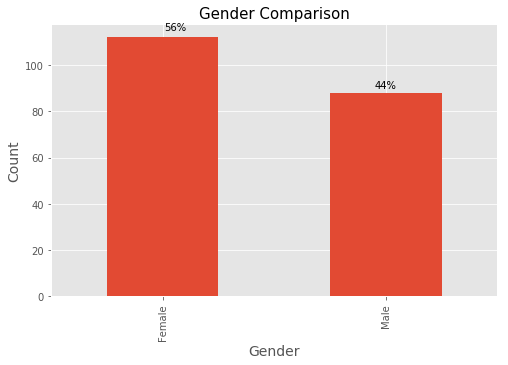

In [11]:
ax = df["Gender"].value_counts().plot(kind = "bar",figsize = (8,5))

plt.title("Gender Comparison",fontsize = 15)
plt.xlabel("Gender",fontsize=14)
plt.ylabel("Count",fontsize=14)
ax.text(x = 0.005, y = 115, s = "56%")
ax.text(x = 0.95, y = 90, s = "44%")


#### Brief summary
According to above figure, the percentage of female customers is 56%, and the percentage of male customers is 44%.

### Age overview

In [12]:
# Generate descriptive statistic of Age
df["Age"].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

[ 0 12 43 61 39 25 20]
[ 0. 10. 20. 30. 40. 50. 60. 70.]


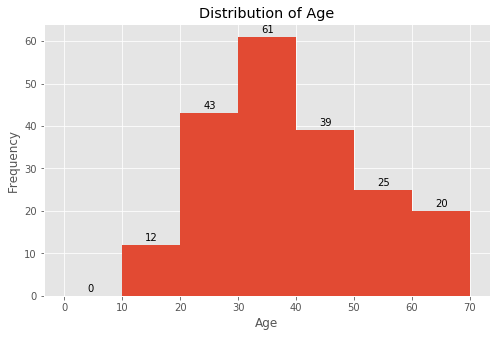

In [13]:
# Plot histogram of Age
count_age, bin_edges_age = np.histogram(df["Age"], bins=7, range=(0,70))
ax_age = df["Age"].plot(kind="hist", figsize=(8,5), bins=bin_edges_age)
print(count_age) 
print(bin_edges_age)

plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

for i in range(len(count_age)):
    ax_age.text(x=10*i+4, y=count_age[i]+1, s=count_age[i])
    
plt.show()

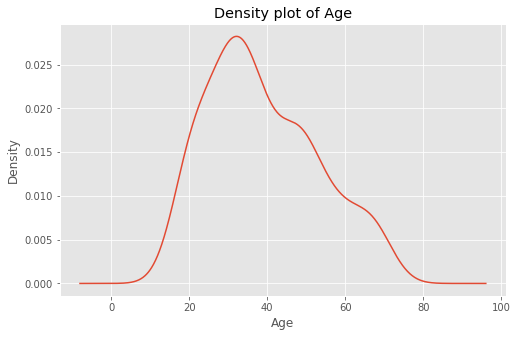

In [14]:
# Plot density figute of Age
df["Age"].plot(kind="density", figsize=(8,5))


plt.title("Density plot of Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

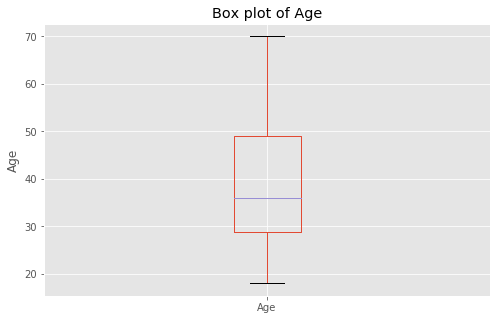

In [15]:
# Plot Box plot of Age
df["Age"].plot(kind="box", figsize=(8,5))

plt.title("Box plot of Age")
plt.ylabel("Age")
plt.show()

#### Brief summary
From above figures, we conclude that:
1. The Maximum age is 70, the minimum age is 18, and the mean of age is 38. 
2. Age from 30 to 40 is the largest calss in the distribution, which has 61 customers in this class.   
3. Age distribution is a right skewed distribution, in which the mean (38) larger than the median (36).


### Annual Income Overview


In [16]:
# Generate descriptive statistic of Annual Income
df["Annual Income (k$)"].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

[ 0 12 18 16 26 20 32 38 16  8  6  2  4  2]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140.]


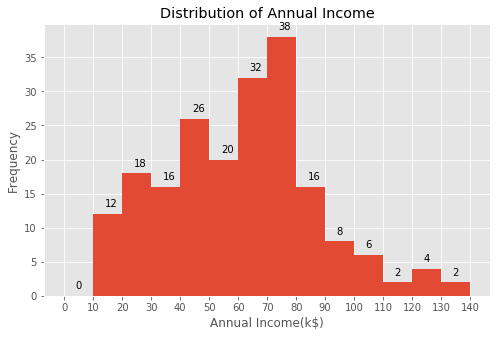

In [17]:
# Plot histogram of Annual Income
count_annualincome,bin_edges_annualincome = np.histogram(df["Annual Income (k$)"],bins=14,range=(0,140))
print(count_annualincome) 
print(bin_edges_annualincome)

ax_annualincome= df["Annual Income (k$)"].plot(kind="hist",
                                   figsize=(8,5),
                                   bins=bin_edges_annualincome, 
                                   xticks=bin_edges_annualincome)

plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Frequency")

for i in range(len(count_annualincome)):
    ax_annualincome = plt.text(x=10*i+4, y=count_annualincome[i]+1,s=count_annualincome[i])
    
plt.show()

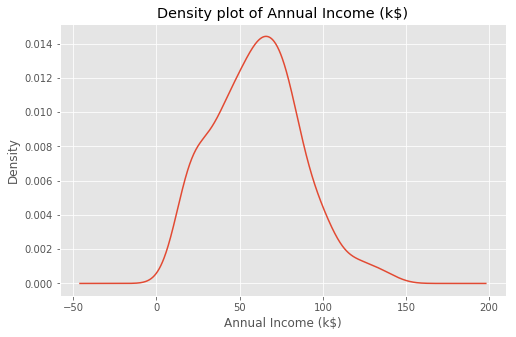

In [18]:
# Plot density plot of Annual Income 
df["Annual Income (k$)"].plot(kind="density",figsize=(8,5))

plt.title("Density plot of Annual Income (k$)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Density")
plt.show()

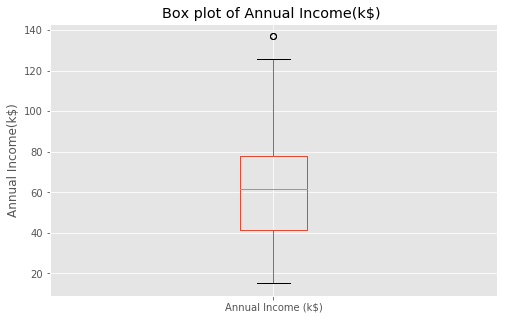

In [19]:
# Plot box plot of annual income
df["Annual Income (k$)"].plot(kind="box",figsize=(8,5))

plt.title("Box plot of Annual Income(k$) ")
plt.ylabel("Annual Income(k$)")
plt.show()

#### Brief summary

From above figures, we conclude that:
1. Maximum annual income is 137 k\\$, minimum annual income is 15 k\\$, and the mean value is 60.56 k\\$. 
2. Annual income between 70 to 80 k\\$  is the largest class, which includes 38 customers. 
3. Annual income is a normal distribution.


### Spending Score overview

In [20]:
# Generate descriptive statistic of Spending Score
df["Spending Score (1-100)"].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

[14 20 12 13 39 37 11 24 14 16]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


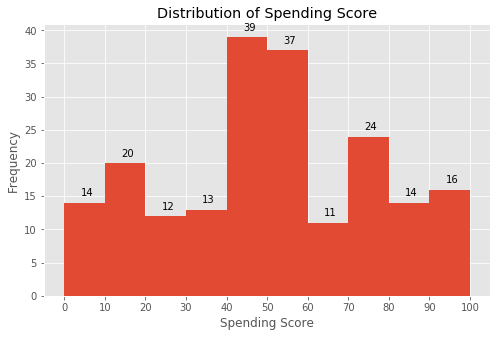

In [21]:
# Plot histogram of Spending score
counts_spendingscore, bin_edges_spendingscore = np.histogram(df["Spending Score (1-100)"],bins=10, range=(0,100))
print(counts_spendingscore)
print(bin_edges_spendingscore)

ax_spendingscore = df["Spending Score (1-100)"].plot(kind="hist",figsize=(8,5),
                                                     bins=bin_edges_spendingscore,
                                                    xticks=bin_edges_spendingscore)

plt.title("Distribution of Spending Score")
plt.xlabel("Spending Score")
plt.ylabel("Frequency")

for i in range(len(counts_spendingscore)):
    ax_spendingscore.text(x=10*i+4, y=counts_spendingscore[i]+1, s=counts_spendingscore[i])
    
plt.show()

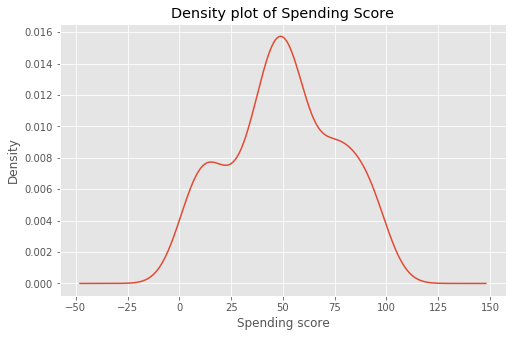

In [22]:
# Plot density plot of Spending socre
df["Spending Score (1-100)"].plot(kind="density",figsize=(8,5))

plt.title("Density plot of Spending Score")
plt.xlabel("Spending score")
plt.ylabel("Density")
plt.show()

Text(0,0.5,'Spending Score (1-100)')

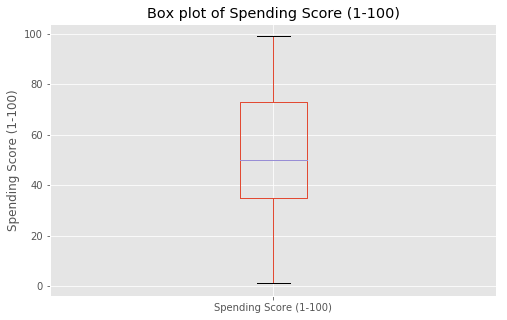

In [23]:
# Box plot of Spending score
df["Spending Score (1-100)"].plot(kind="box",figsize=(8,5))

plt.title("Box plot of Spending Score (1-100)")
plt.ylabel("Spending Score (1-100)")



#### Brief summary

From above figures, we conclude that:
1. The maximum spending socre is 99, the minimum spending socre is 1, ,and the mean value is 50.2. 
2. Among all the classes, score between class 40 and 50 has the highest number of customers, which is 39.

<a id='Comparisonbetweenmultiplefeatures'></a>
### Comparison between multiple features


After having an overview of each features, we then go on to see the relation between multiple features. By understanding the realtion between different features, we can have a better insight to choose the features for clustering later.

In [24]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


Since Gender is categorical data, we first tranform Gender into numerical data (0&1)

In [25]:
# Transform Gender inot numerical data
gender_dummies = pd.get_dummies(df["Gender"])
df_dummies = df.join(gender_dummies)
df_dummies.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0


In [26]:
# rename the dataframe
df_dummies.rename(columns={"Female":"IsFemale","Male":"IsMale"},inplace=True)
df_dummies.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),IsFemale,IsMale
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0


We want to check the correlation between each features, so here we use Heatmap to see the results.

Text(0.5,1,'Heatmap of features')

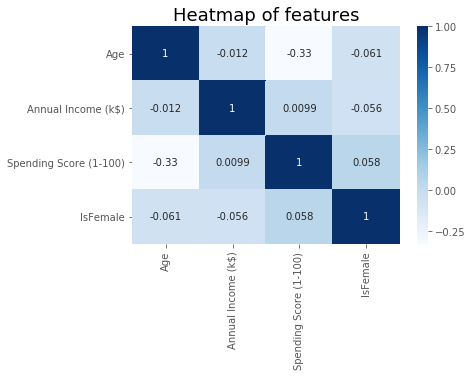

In [27]:
# From df_dummies, we choose Age, Annual Income, Spending socre, IsFemale to see their correlation.
# Note that "IsFemale" represents the Gender feature, 1 refers to female, 0 refers to male.
heatmap = sns.heatmap(df_dummies.iloc[:,[2,3,4,5]].corr(),annot = True, cmap='Blues')
heatmap.set_title("Heatmap of features",fontsize=18)

#### Brief summary
From above heatmap, we can see that nearly all the features have no relation between each others since the correlation value is too small. The highest correlation happens in "Age" and "Spending Score", which is -0.33, but it is still not high enough to indicate strong relation between these two features.    
We conclude that there are no strong linear relationship between the featrues.

Now, we use pairplot to visualize the data. This step might give us more information through the diagram.

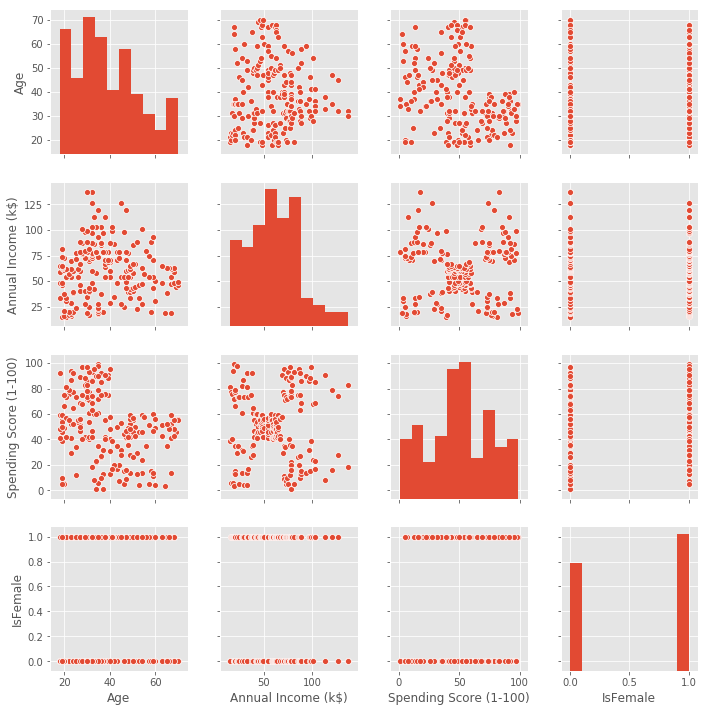

In [28]:
sns.pairplot(df_dummies.iloc[:,[1,2,3,4,5]])

#### Brief summary

From above figures, we can find something interesting:

1. According to age versus annual Income scatter plot, we found that middle-aged customers have higher annual income.
2. According to age versus spending score scatter plot, we found that young and middle-aged customers have higher spending score. On the contraty, older aged customers have relatively low spending score.     
3. According to annual income versus spending score scatter plot, we found that there are obviously clusters in the figures, therefore, **annual income and spending score could be suitable featrues for further analysis**.
4. According to scatter plot between IsFemale (which represents Gender) versus other features, we can found that there are no obvious differences caused by gender, therefore, gender might not take an important role in our further clustering.

#### Some Insights
1. Young and middle-aged customers seems to be our primiary customers. Since middle-aged customers have higher income, we can customized products with high-quality and higher price to target middle-aged customers.
2. Our porducts are suitable for both male and female. Also, the gender netural products is a good options when we launching our new products.

We can use Gender as our label to visualize pairplot again in order to double check whetehr gender is an enssential role in our further clustering.

/Users/sandy/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/Users/sandy/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



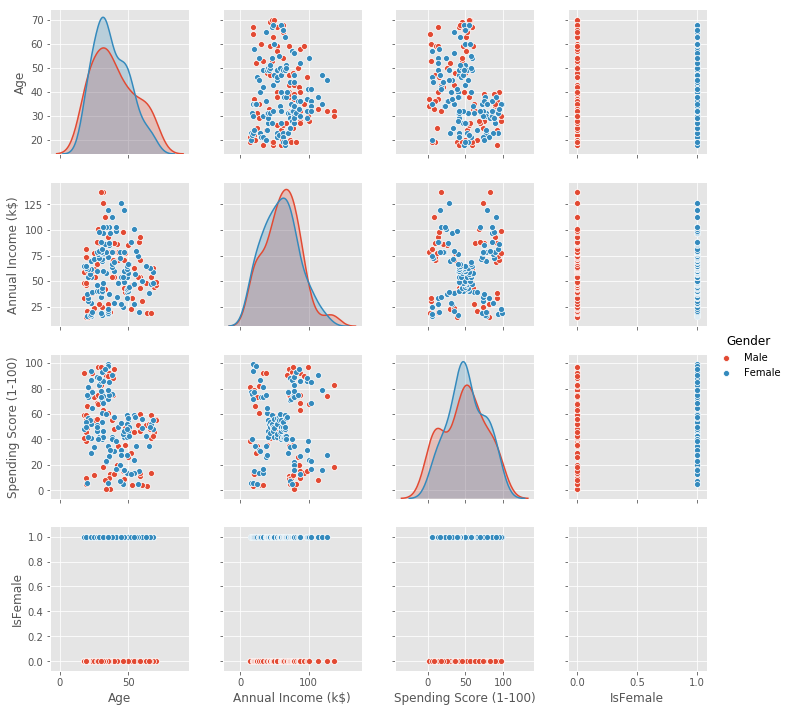

In [29]:
sns.pairplot(df_dummies.iloc[:,[1,2,3,4,5]],hue="Gender")

We can see between each scatter plots, Gender presents no siginificant influence in the figures. So we decide to ignore gender in further clustering.

<a id='Clustering'></a>
## 4.2 Clustering


In this project, we choose **K-Means Clustering** to segement our data since it is a useful method to quickly extract insights from unlabeled data.    

The main idea of K-Means Clustering is to minimize the distances of each datapoints in intra-groups and maximize the distances of each datapoints in inter-groups. This method allows the similiar datapoints cluster into the same groups, and dissimilar datapoints are grouped into distinct groups.

**The steps of K-Means Clustering**
1. Decides the number of clusters K we want to segement (i.e. K=3).
2. Algoritm randomly chooses number of K centroid from our dataset for initialize
3. Algorithm calcuates the distances of each datapoints to each centroids, then assigns each datapoints to the nearset centroids as a group.
4. Algorithm re-calculats the centroids in each groups.
5. Alogorithm re-calculats the distance of each datapoints to the new centroids, and assigns each datapoints to the new groups based on the smallest distacne.
6. Iterate the process from steps 4 and 5 until no more changes happens in each datapoints. 
7. We gets our final clusters.

According to above steps, the first thing of K-Means clustering is to find a suitabe number of clusters K. Here we use **Elbow Method** to help us to do so.

**Elbow Method**   

Elbow method is the way to find optimum number of K by minimizeing the **Within-Cluster Sum of Square (WCSS)**. WCSS represents the variance of clusters. Since smaller variance indicates the better clustering, we can draw a plot which x-axis represents the number of cluster (K) and y-axis represents WCSS. Then we can find the elbow point as our optimum number K, where the WCSS decreasing rapidly before this point, and WCSS decreasing slow down after this point. Elbow point indicates that WCSS already minimize to a steady point, continuingly enhance number of K will not have much more impact on minimiaing WCSS.

-------

In this project, we apply K-Means clustering to segement our data. First of all, we  **standardize** our data so that the calculated distance will not be influenced by the units of different features. Then, we do the segemetation three times by using differnt combination of features. Three segemetation are explained below:

1. Segementation1: Using Annual Income and Spending Score
2. Segementation2: Using Age and Spending Score
3. Segementation3: Using Age, Annual Income and Spending Score



<a id='Standardizethedata'></a>

## Standardize the data


In [30]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [31]:
df_standard = pd.DataFrame(StandardScaler().fit_transform(df.values[:,[2,3,4]]),  
                           columns=["Age","Annual Income","Spending Score"])

df_standard

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


<a id='Segmentation1'></a>
## Segmentation1_AnnualIncome_SpendingScore


Use Annual Income and Spending Score as features.

In [32]:
segmentation1 = df_standard.values[:,[1,2]]
segmentation1

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [33]:
# wcss = within cluster sum of square
wcss_1 = []

for i in range(1,12):
    kmeans_1 = KMeans(n_clusters=i, init="k-means++")
    kmeans_1.fit(segmentation1)
    wcss_1.append(kmeans_1.inertia_)
    print("Numbers of K:{}, WCSS:{}".format(i,kmeans_1.inertia_))
   

Numbers of K:1, WCSS:400.0
Numbers of K:2, WCSS:269.6910121927639
Numbers of K:3, WCSS:157.70400815035947
Numbers of K:4, WCSS:108.92131661364357
Numbers of K:5, WCSS:65.56840815571681
Numbers of K:6, WCSS:55.103778121150576
Numbers of K:7, WCSS:44.91118554999014
Numbers of K:8, WCSS:37.197786918695634
Numbers of K:9, WCSS:32.377243774440345
Numbers of K:10, WCSS:29.090568897369717
Numbers of K:11, WCSS:26.511337826694465


Text(0,0.5,'Within-Cluster Sum of Square (WCSS)')

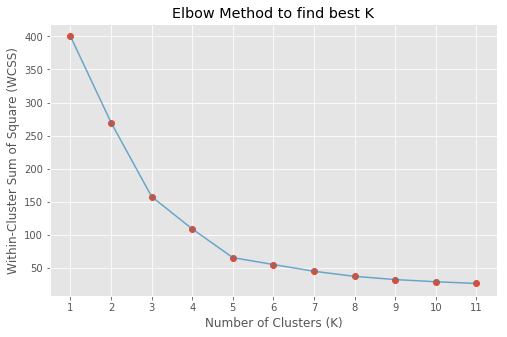

In [34]:
# Draw figure to see where the elbow point is 
plt.figure(figsize=(8,5))
plt.plot(range(1,12),wcss_1,'o')
plt.plot(range(1,12),wcss_1,alpha=0.7)
plt.title("Elbow Method to find best K")
plt.xlabel("Number of Clusters (K)")
plt.xticks(range(1,12))
plt.ylabel("Within-Cluster Sum of Square (WCSS)")


From above figure, we can see the elbow point appear at K = 5. As a result, we choose 5 to be our cluster number.

In [35]:
# Fit K-Means Clustering model, then find label and centroid of each clusters.
kmeansmodel_1 = KMeans(n_clusters = 5, init="k-means++")
kmeansmodel_1.fit(segmentation1)
label_1 = kmeansmodel_1.labels_
centroid_1= kmeansmodel_1.cluster_centers_
print(label_1)
print(centroid_1)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 4 3 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 0 2 4 2 0 2 0 2 4 2 0 2 0 2 0 2 0 2 4 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
[[ 1.05500302 -1.28443907]
 [-1.32954532  1.13217788]
 [ 0.99158305  1.23950275]
 [-1.30751869 -1.13696536]
 [-0.20091257 -0.02645617]]


In [36]:
# Generate a new table with cluster number
# "Segmentation" is the original label given by the Algorithm from 0 to 4. 
# "Cluster" is the label(from 1 to 5) easier for people to understand.
df_segmentation1 = df.copy()
df_segmentation1["Annual Income_standard"] = df_standard["Annual Income"]
df_segmentation1["Spending Score_standard"] = df_standard["Spending Score"]
df_segmentation1["Segmentation"] = label_1
df_segmentation1["Cluster"] = label_1+1
df_segmentation1


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income_standard,Spending Score_standard,Segmentation,Cluster
0,1,Male,19,15,39,-1.738999,-0.434801,3,4
1,2,Male,21,15,81,-1.738999,1.195704,1,2
2,3,Female,20,16,6,-1.700830,-1.715913,3,4
3,4,Female,23,16,77,-1.700830,1.040418,1,2
4,5,Female,31,17,40,-1.662660,-0.395980,3,4
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2.268791,1.118061,2,3
196,197,Female,45,126,28,2.497807,-0.861839,0,1
197,198,Male,32,126,74,2.497807,0.923953,2,3
198,199,Male,32,137,18,2.917671,-1.250054,0,1


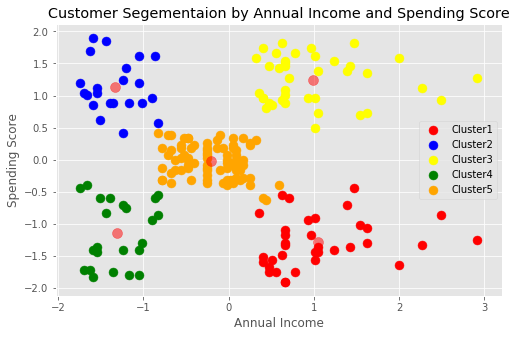

In [50]:
# Visualize the clustering 
plt.figure(figsize=(8,5))
plt.scatter(segmentation1[label_1==0,0],segmentation1[label_1==0,1],s=80, c="red", label="Cluster1")
plt.scatter(segmentation1[label_1==1,0],segmentation1[label_1==1,1],s=80, c="blue", label="Cluster2")
plt.scatter(segmentation1[label_1==2,0],segmentation1[label_1==2,1],s=80, c="yellow", label="Cluster3")
plt.scatter(segmentation1[label_1==3,0],segmentation1[label_1==3,1],s=80, c="green", label="Cluster4")
plt.scatter(segmentation1[label_1==4,0],segmentation1[label_1==4,1],s=80, c="orange", label="Cluster5")
plt.scatter(centroid_1[:,0],centroid_1[:,1],s=100, c="red",alpha=0.5)

plt.title("Customer Segementaion by Annual Income and Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()

<a id='s1summary'></a>
**Brief summary**

In segementatino1, we use Annual Income and Spending Score to segment our data into 5 clusters. Each clusters is described below:

1. Cluster1: High Annual Income with low Spending Score
2. Cluster2: Low Annual Incom with high Spending Score
3. Cluster3: High Annual Income with high Spending Score
4. Cluster4: Low Annual Income with low Spending Score
5. Cluster5: Intermediate Annual Income with Intermediate Spending Score

**Some Insights**
1. We might need to apply customized products to Cluster1. Since Cluster1 has high income, however, it seems we did not reach the market to them. Cluster1 is the groups we need to take our efforts to appraoch.
2. Cluster2 and Cluster3 are our primary customers. Since Cluster2 has relatively low income, launching cheaper products might attract their attention. 
3. Cluster4 is not our target customers since it has lower income and lower spending socre. It might not have much space for use to increase their spending.
4. Cluster5 is our potential customers. We colud get more information and apply suitable strategy in order to enhance their willing for more engagement.



<a id='Segmentation2'></a>
## Segmentation2_Age_SpendingScore


Use Age and Spending Score as features.

In [38]:
segmentation2 = df_standard.values[:,[0,2]]
segmentation2

array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992],
       [-1.20926872,  1.00159627],
       [-0.27630176, -1.71591298],
       [-1.13750203,  1.70038436],
       [ 1.80493225, -1.83237767],
       [-0.6351352 ,  0.84631002],
       [ 2.02023231, -1.4053405 ],
       [-0.27630176,  1.89449216],
       [ 1.37433211, -1.36651894],
       [-1.06573534,  1.04041783],
       [-0.13276838, -1.44416206],
       [-1.20926872,  1.11806095],
       [-0.27630176, -0.59008772],
       [-1.3528021 ,  0.61338066],
       [ 0.94373197, -0.82301709],
       [-0.27630176,  1.8556706 ],
       [-0.27630176, -0.59008772],
       [-0.99396865,  0.88513158],
       [ 0.51313183, -1.75473454],
       [-0.56336851,  0.88513158],
       [ 1.08726535, -1.4053405 ],
       [-0.70690189,  1.23452563],
       [ 0.44136514, -0.7065524 ],
       [-0.27630176,  0.41927286],
       [ 0.08253169,

In [39]:
# wcss = within cluster sum of square
wcss_2 = []

for i in range(1,12):
    kmeans_2 = KMeans(n_clusters=i, init="k-means++")
    kmeans_2.fit(segmentation2)
    wcss_2.append(kmeans_2.inertia_)
    print("Numbers of K:{}, WCSS:{}".format(i,kmeans_2.inertia_))
   

Numbers of K:1, WCSS:399.99999999999994
Numbers of K:2, WCSS:189.3874903399243
Numbers of K:3, WCSS:124.32628617921529
Numbers of K:4, WCSS:89.76521676586151
Numbers of K:5, WCSS:71.24407583828105
Numbers of K:6, WCSS:53.44767414723813
Numbers of K:7, WCSS:45.91803244955263
Numbers of K:8, WCSS:39.72507389961898
Numbers of K:9, WCSS:33.93519961278706
Numbers of K:10, WCSS:28.73628383293513
Numbers of K:11, WCSS:25.467180756298454


Text(0,0.5,'Within-Cluster Sum of Square (WCSS)')

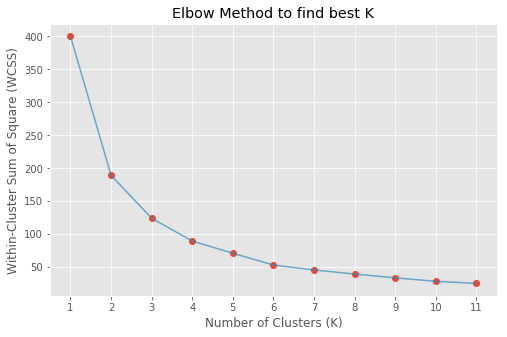

In [40]:
# Draw figure to see where the elbow point is 
plt.figure(figsize=(8,5))
plt.plot(range(1,12),wcss_2,'o')
plt.plot(range(1,12),wcss_2,alpha=0.7)
plt.title("Elbow Method to find best K")
plt.xlabel("Number of Clusters (K)")
plt.xticks(range(1,12))
plt.ylabel("Within-Cluster Sum of Square (WCSS)")


From above figure, we can see the elbow point appear at K = 4. As a result, we choose 4 to be our cluster number.

In [51]:
# Fit K-Means Clustering model, then find label and centroid of each clusters.
kmeansmodel_2 = KMeans(n_clusters = 4, init="k-means++")
kmeansmodel_2.fit(segmentation2)
label_2 = kmeansmodel_2.labels_
centroid_2= kmeansmodel_2.cluster_centers_
print(label_2)
print(centroid_2)

[0 1 0 1 0 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 0 1 3 1 3 1 2 1 3 0 0 0 3 1 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 1 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 1 1 0 1 2 1 2 1 2 1 0 1 0 1 2 1 0 1 2 1 0 1 0 1 3 1
 0 1 2 1 2 1 2 1 2 1 2 1 3 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 0
 1 2 1 2 1 0 1 2 1 2 1 2 1 0 1]
[[-0.8346466  -0.39442706]
 [-0.61415725  1.14971545]
 [ 0.62833625 -1.36651894]
 [ 1.22927178 -0.06558366]]


In [52]:
# Generate a new table with cluster number
df_segmentation2 = df.copy()
df_segmentation2["Age_standard"] = df_standard["Age"]
df_segmentation2["Spending Score_standard"] = df_standard["Spending Score"]
df_segmentation2["Segmentation"] = label_2
df_segmentation2["Cluster"] = label_2+1
df_segmentation2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_standard,Spending Score_standard,Segmentation,Cluster
0,1,Male,19,15,39,-1.424569,-0.434801,0,1
1,2,Male,21,15,81,-1.281035,1.195704,1,2
2,3,Female,20,16,6,-1.352802,-1.715913,0,1
3,4,Female,23,16,77,-1.137502,1.040418,1,2
4,5,Female,31,17,40,-0.563369,-0.395980,0,1
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,-0.276302,1.118061,1,2
196,197,Female,45,126,28,0.441365,-0.861839,2,3
197,198,Male,32,126,74,-0.491602,0.923953,1,2
198,199,Male,32,137,18,-0.491602,-1.250054,0,1


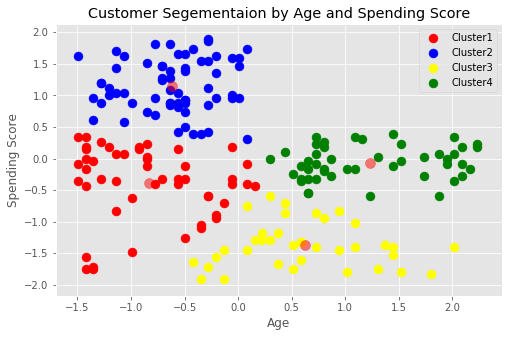

In [53]:
# Visualize the clusters
plt.figure(figsize=(8,5))
plt.scatter(segmentation2[label_2==0,0],segmentation2[label_2==0,1],s=80, c="red", label="Cluster1")
plt.scatter(segmentation2[label_2==1,0],segmentation2[label_2==1,1],s=80, c="blue", label="Cluster2")
plt.scatter(segmentation2[label_2==2,0],segmentation2[label_2==2,1],s=80, c="yellow", label="Cluster3")
plt.scatter(segmentation2[label_2==3,0],segmentation2[label_2==3,1],s=80, c="green", label="Cluster4")
plt.scatter(centroid_2[:,0],centroid_2[:,1],s=100, c="red",alpha=0.5)

plt.title("Customer Segementaion by Age and Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend()

<a id='s2summary'></a>
**Brief summary**

In segementaion2
, we use Age and Spending Score to segment our data into 4 clusters. Each clusters is described below:

1. Cluster1: Low to medium Age with low to medium Spending Score
2. Cluster2: Low to medium Age with high Spending Score
3. Cluster3: Medium to old Age with low Spending Score
4. Cluster4: Medium to old Age with medium Spending Score


**Some Insights**
1. Cluster1 and Clust4 are our potential customers since they are have medium spending socre. For these two groups, we colud have more investigation to have deeper understanding of their demand, and adjust our products and marketing startegy to enhance their engagement.
2. Cluster2 is our primary customer. They are between young and middle-aged, so that we could launch fasion types of products to cater their appetite.
3. Cluster3 not seems to be our target customers. Maybe we colud develop new types of products which suitable for elder, then cluster3 customers might have high willing to buy it.



<a id='Segmentation3'></a>
## Segmentation3_Age_AnualIncome_SpendingScore


Use Age, Annual income and Spending Score as features.

In [44]:
segmentation3 = df_standard.values[:]
segmentation3

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [45]:
# wcss = within cluster sum of square
wcss_3 = []

for i in range(1,12):
    kmeans_3 = KMeans(n_clusters=i, init="k-means++")
    kmeans_3.fit(segmentation3)
    wcss_3.append(kmeans_3.inertia_)
    print("Numbers of K:{}, WCSS:{}".format(i,kmeans_3.inertia_))
   

Numbers of K:1, WCSS:600.0
Numbers of K:2, WCSS:389.3861889564372
Numbers of K:3, WCSS:295.26029648861174
Numbers of K:4, WCSS:205.22514747675916
Numbers of K:5, WCSS:168.24758017556837
Numbers of K:6, WCSS:133.86833362685584
Numbers of K:7, WCSS:117.08803464058246
Numbers of K:8, WCSS:103.79880784051781
Numbers of K:9, WCSS:92.30673264713685
Numbers of K:10, WCSS:81.85367864975905
Numbers of K:11, WCSS:73.5513327445625


Text(0,0.5,'Within-Cluster Sum of Square (WCSS)')

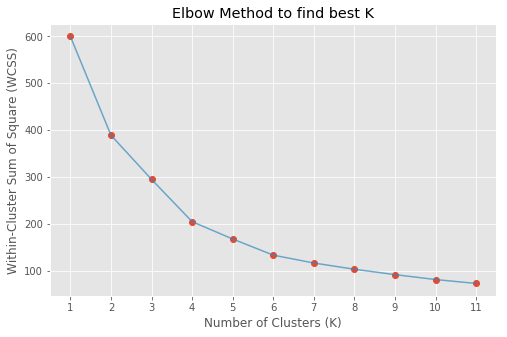

In [46]:
# Draw figure to see where the elbow point is 
plt.figure(figsize=(8,5))
plt.plot(range(1,12),wcss_3,'o')
plt.plot(range(1,12),wcss_3,alpha=0.7)
plt.title("Elbow Method to find best K")
plt.xlabel("Number of Clusters (K)")
plt.xticks(range(1,12))
plt.ylabel("Within-Cluster Sum of Square (WCSS)")


From above figure, we can see the elbow point appear at K = 6. As a result, we choose 6 to be our cluster number.

In [80]:
# Fit K-Means Clustering model, then find label and centroid of each clusters.
kmeansmodel_3 = KMeans(n_clusters = 6, init="k-means++")
kmeansmodel_3.fit(segmentation3)
label_3 = kmeansmodel_3.labels_
centroid_3= kmeansmodel_3.cluster_centers_
print(label_3)
print(centroid_3)

[5 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3
 5 3 5 4 5 3 0 3 5 4 0 0 0 4 0 0 4 4 4 4 4 0 4 4 0 4 4 4 0 4 4 0 0 4 4 4 4
 4 0 4 0 0 4 4 0 4 4 0 4 4 0 0 4 4 0 4 0 0 0 4 0 4 0 0 4 4 0 4 0 4 4 4 4 4
 0 0 0 0 0 4 4 4 4 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 4 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
[[-0.85043527 -0.14894113 -0.04147777]
 [ 0.17329545  1.06645385 -1.2980103 ]
 [-0.44191719  0.99158305  1.23950275]
 [ 0.47895722 -1.30822992 -1.19644353]
 [ 1.25472096 -0.24021294 -0.04399777]
 [-0.99396865 -1.34734766  1.06404834]]


In [81]:
# Generate a new table with cluster number
df_segmentation3 = df.copy()
df_segmentation3["Age_standard"] = df_standard["Age"]
df_segmentation3["Annual Income_standard"] = df_standard["Annual Income"]
df_segmentation3["Spending Score_standard"] = df_standard["Spending Score"]
df_segmentation3["Segmentation"] = label_3
df_segmentation3["Cluster"] = label_3+1
df_segmentation3

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_standard,Annual Income_standard,Spending Score_standard,Segmentation,Cluster
0,1,Male,19,15,39,-1.424569,-1.738999,-0.434801,5,6
1,2,Male,21,15,81,-1.281035,-1.738999,1.195704,5,6
2,3,Female,20,16,6,-1.352802,-1.700830,-1.715913,3,4
3,4,Female,23,16,77,-1.137502,-1.700830,1.040418,5,6
4,5,Female,31,17,40,-0.563369,-1.662660,-0.395980,3,4
...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,-0.276302,2.268791,1.118061,2,3
196,197,Female,45,126,28,0.441365,2.497807,-0.861839,1,2
197,198,Male,32,126,74,-0.491602,2.497807,0.923953,2,3
198,199,Male,32,137,18,-0.491602,2.917671,-1.250054,1,2


In [82]:
# Visualize the clusters
trace = go.Scatter3d( 
    x = segmentation3[:,0], 
    y = segmentation3[:,1],  
    z = segmentation3[:,2], 
    mode = "markers",
    marker = dict( 
    color=label_3, 
    size=10,
    line=dict( 
    color=label_3,
    width=12),      
    opacity=0.8
    )
   
)


data = [trace]
layout = go.Layout(
    title= 'Cluster segementation by Age, Anual Income and Spending Score',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Annual Income'),
            zaxis = dict(title  = 'Spending Score')
        )
)
fig = go.Figure(data=data, layout=layout)


py.offline.iplot(fig)

In [95]:
df_segmentation3.groupby(df_segmentation3["Cluster"]).mean()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Age_standard,Annual Income_standard,Spending Score_standard,Segmentation
Cluster,,,,,,,,
1,90.052632,27.000000,56.657895,49.131579,-0.850435,-0.148941,-0.041478,0
2,164.529412,41.264706,88.500000,16.764706,0.173295,1.066454,-1.298010,1
3,162.000000,32.692308,86.538462,82.128205,-0.441917,0.991583,1.239503,2
4,23.190476,45.523810,26.285714,19.380952,0.478957,-1.308230,-1.196444,3
5,83.777778,56.333333,54.266667,49.066667,1.254721,-0.240213,-0.043998,4
6,22.130435,25.000000,25.260870,77.608696,-0.993969,-1.347348,1.064048,5


<a id='s3summary'></a>
**Brief summary**

In segementaiton3, we usee Age, Annual Income and Spending score as our features.
Since it is not easy to identiy each clusters in 3D plot, we calcuate the mean value of each features corresponding to differnet clusters. We can explain each cluster as below

1. Cluster1: Young, medium income and medium spending socre
2. Cluster2: Middle-aged, high income and low spending score
3. Cluster3: Middle-aged, high income and hihg spending score
4. Cluster4: Middle-agged, low income and low spending score 
5. Cluster5: Middle to old aged, middle income and middle spending score
6. Cluster6: Young, low income and high spending score


**Some Insights**
1. Cluster3 and Cluster6 are our primary customers since they have high spending score. We can differencinate the products to service these two groups. We can provide cheaper and fasion products to Cluster6 since they are young and has lower income. Besides, we can provide high quality and high price product to cluster3 since they are in middle-aged, who might concern about product quality, and they are able to afford higher price product.
2. Cluster1 and Cluster5 are our potential customers. They all have medium spending score and medium income. We might need to apply tailored product according to their age and interests to enhance their engagement
3. Cluster2 seems to the kind of our target customer. These might since our product type are originally not service for them, we can get more information to make further analysis.
4. Cluster4 seems to our target customer. Since they have both low income and spending socre, we might consider not put effort to enhance their engagement.



<a id='Discussion'></a>
# 5. Discussion   



**How to consider which features are included in our Segementation?**

In this project, we have tried 3 types segementation by using different combination of our features. In my opinion, I thought a good way to choose which features will be included in our segementation is to do the Exploratory Eata Analysis (EDA) first. Here, Segementation1, which included Annual income and Spending score, are based on our results of EDA, and we can see the analysis are quite suitable for us to make properly strategy to customers. However, in this case, since all the features have no high correlation between each others, we choose to do more segementation to see wheter something new might be discover in different kind of segementation. Also, since this project is based on simple dataset, we do not have other kinds of information, such as marketing position of our product, the price and our original target customer,etc, so we just tried all kinds of segementations. If we have more information, we colud based on the marketing knowlege to have better basis for features extracting.

<a id='Conclusions'></a>
# 6. Conclusions


In this project, we set our objective to answer the following questions:

1. What is the features of each groups (clusters)?       
  
2. What marketing strategis or advices will be given based on my analysis?

After our analysing and clustering, we can anwer above questions as below

1. Segmentation1: Using Annual Income and Spending Score as features

   Please refers to: [Summary and insights of Segmentation1](#s1summary)    


2. Segmentation2: Using Age and Spending Score as features    

   Please refers to: [Summary and insights of Segmentation2](#s2summary)    


3. Segmentation3: Using Age, Annual Income and Spending Score as features 

   Please refers to: [Summary and insights of Segmentation3](#s3summary)    

-----

In this project, we go through the process to analysising and clustering customers for applying suitable marketing strategies. Although our dataset are simple, we still can conclude some insights from it. We can capture more information from our customers for further analysis and get more insights for marketing actions.


<a id='References'></a>
# 7. References



- dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
- https://www.kaggle.com/inferni1997/eda-and-clustering-with-k-means
- https://towardsdatascience.com/customer-segmentation-analysis-with-python-6afa16a38d9e
- https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac
- https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis
- https://www.kaggle.com/roshansharma/mall-customers-clustering-analysis
- https://www.kaggle.com/vjchoudhary7/kmeans-clustering-in-customer-segmentation